In [9]:
import d3ploy.tester as tester
import d3ploy.plotter as plotter
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
output_file = 'eg01-eg23-flatpower-d3ploy-buffer0-ma.sqlite'
demand_eq = '60000'
commods = ['sourceout','enrichmentout','mixerout','power']

In [47]:
all_dict_power = tester.supply_demand_dict_driving(output_file, demand_eq, 'power')
all_dict_sfrfuel = tester.supply_demand_dict_nondriving(output_file, 'mixerout', True, calc=False)
all_dict_lwrfuel = tester.supply_demand_dict_nondriving(output_file, 'enrichmentout', True, calc=False)
all_dict_natlu = tester.supply_demand_dict_nondriving(output_file, 'sourceout', True,calc=False)

In [48]:
def supplydemanddiff(all_dict):
    
    dict_demand = all_dict['dict_demand']
    dict_supply = all_dict['dict_supply']
    diff_dict = {}
    for key in dict_demand: 
        diff_dict[key] = dict_supply[key] - dict_demand[key] 
    return diff_dict

In [49]:
power_diff_dict = supplydemanddiff(all_dict_power)
sfrfuel_diff_dict = supplydemanddiff(all_dict_sfrfuel)
lwrfuel_diff_dict = supplydemanddiff(all_dict_lwrfuel)
natlu_diff_dict = supplydemanddiff(all_dict_natlu)

In [50]:
power_dict_dots = {}
sfrfuel_dict_dots = {}
lwrfuel_dict_dots = {}
natlu_dict_dots = {}
for key in power_diff_dict: 
    if power_diff_dict[key] < 0: 
        power_dict_dots[key] = 4
for key in sfrfuel_diff_dict: 
    if sfrfuel_diff_dict[key] < 0: 
        sfrfuel_dict_dots[key] = 3
for key in lwrfuel_diff_dict: 
    if lwrfuel_diff_dict[key] < 0: 
        lwrfuel_dict_dots[key] = 2
for key in natlu_diff_dict: 
    if natlu_diff_dict[key] < 0: 
        natlu_dict_dots[key] = 1

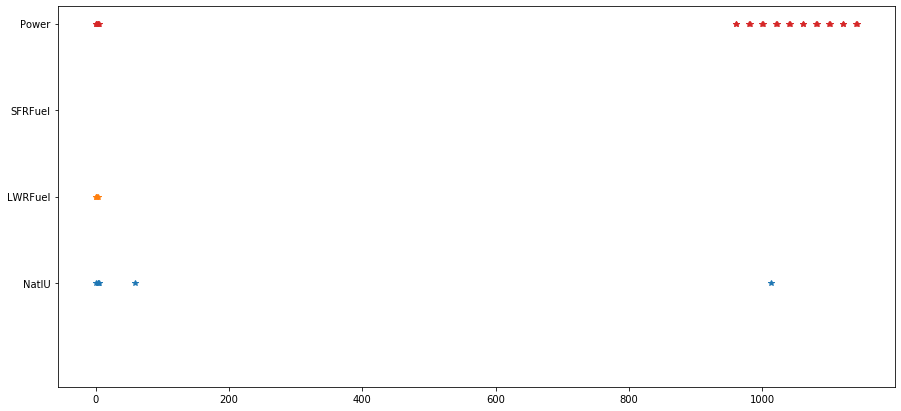

In [51]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(*zip(*sorted(natlu_dict_dots.items())),'*')
ax.plot(*zip(*sorted(lwrfuel_dict_dots.items())),'*')
ax.plot(*zip(*sorted(sfrfuel_dict_dots.items())),'*')
ax.plot(*zip(*sorted(power_dict_dots.items())),'*')
ax.set_yticks([1,2,3,4])
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[0] = 'NatlU'
labels[1] = 'LWRFuel'
labels[2] = 'SFRFuel'
labels[3] = 'Power'
ax.set_yticklabels(labels)
plt.show()

In [52]:
for key in power_diff_dict:
    if power_diff_dict[key] > 0: 
        power_diff_dict[key] = 0 
    if power_diff_dict[key] < 0: 
        power_diff_dict[key] = -power_diff_dict[key]
        
for key in sfrfuel_diff_dict:
    if sfrfuel_diff_dict[key] > 0: 
        sfrfuel_diff_dict[key] = 0 
    if sfrfuel_diff_dict[key] < 0: 
        sfrfuel_diff_dict[key] = -sfrfuel_diff_dict[key]
        
for key in lwrfuel_diff_dict:
    if lwrfuel_diff_dict[key] > 0: 
        lwrfuel_diff_dict[key] = 0 
    if lwrfuel_diff_dict[key] < 0: 
        lwrfuel_diff_dict[key] = -lwrfuel_diff_dict[key]
        
for key in natlu_diff_dict:
    if natlu_diff_dict[key] > 0: 
        natlu_diff_dict[key] = 0 
    if natlu_diff_dict[key] < 0: 
        natlu_diff_dict[key] = -lwrfuel_diff_dict[key]

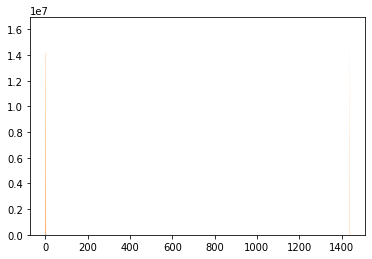

In [53]:
fig, ax = plt.subplots()
ax.stackplot(list(power_diff_dict.keys()), list(power_diff_dict.values()),list(lwrfuel_diff_dict.values()))
plt.show()